# Recursive Sorting And Data Structures

Now that we have the basics for sorting down, let's move onto some more advanced algorithms.  As said in the last section, these algorithms will rely on recursion to sort the elements of the array in question.  Unfortunately, we will not be able to present an analysis of these algorithms in this section, for that we will require a new set of analysis tools, which we will see in the next section.

## Merge Sort

The merge sort algorithm will be the first we see that gets used often in industry.  It is of a class of algorithms called divide and conquer, where first we divide the input up into parts, then process the input, then glue the input back together.  The merge sort algorithm does much more than just give us a new way to sort, it gives us a new framework for how to _think_ about computation and programming.  Let's look at an implementation:

In [4]:
import random

def merge(left: list, right: list) -> list:
    left_index = 0
    right_index = 0
    final = []
    while left_index < len(left) and right_index < len(right):
        left_element = left[left_index]
        right_element = right[right_index]
        if left_element <= right_element:
            final.append(left_element)
            left_index += 1
        else:
            final.append(right_element)
            right_index += 1
    final += left[left_index:]
    final += right[right_index:]
    return final

def merge_sort(arr):
    if len(arr) == 1 or len(arr) == []:
        return arr
    mid_point = len(arr)//2
    
    left = merge_sort(arr[:mid_point])
    right = merge_sort(arr[mid_point:])
    return merge(left, right)

def test_merge_sort():
    for _ in range(1000):
        array = [random.randint(0, 500) for _ in range(1000)]
        sorted_array = array[:]
        sorted_array.sort()
        assert merge_sort(array) == sorted_array
    
test_merge_sort()

While at first this code may seem kinda nuts, like why would this possibly work?  But once we analyze it, it should at least be somewhat clearer.

Let's begin with the steps we from last time - 

1. Find the point of comparison
2. Find the swap

You may be tempted to look at the merge_sort procedure for this, but alas there is no comparison or swapping here.  The actual sorting all happens in the `merge` function defined first.  

Since the comparison and swap happen pretty close by it's easier to just show you the merge function and then point out where comparison and swap are happening:

```python
1  def merge(left: list, right: list) -> list:
2     left_index = 0
3     right_index = 0
4     final = []
5     while left_index < len(left) and right_index < len(right):
6         left_element = left[left_index]
7         right_element = right[right_index]
8         if left_element <= right_element:
9             final.append(left_element)
10            left_index += 1
11        else:
12            final.append(right_element)
13            right_index += 1
14    final += left[left_index:]
15    final += right[right_index:]
16    return final
```

The key to understanding the `merge` function is understanding _what it returns_.  As you can see `merge` returns `final`.  The `final` array stores the elements from the two subarrays, `left` and `right` in _sorted order_.  So as we append to final, we do so such that elements are only appended if they are done so such that the _next smallest element from either array_ is added.  This is how we guarantee that the returned array `final` is sorted.  With that as context, let's look at the comparison.

On line 8, 11, 14 and 15 the comparison happens.  

Let's start with line 8 since it's the most explicit.

We have:

```python
if left_element <= right_element:
    final.append(left_element)
    left_index += 1
else:
    final.append(right_element)
    right_index += 1
```

Here we append the left element to the final array since it is less than ther right element.  On line 11 we see the else.  In this case, the right element is less, thus it gets appended to final.  The next comparison happens implicitly on lines 14 and 15:

```python
final += left[left_index:]
final += right[right_index:]
```

This is because we _start_ with the left_index, so implicitly we are assuming that we've already made all the possible comparisons between the left and right sub arrays.  In fact, at this point of the code only `left` or `right` will be non-empty as the while loop in line 5 continues until _at least_ one of the sub-arrays is empty.  If there are remaining elements to append to the final array they will _either_ be in the left or right subarray.  Since there is no way to tell ahead of time which one will be non-empty we simply include both statements.  We could be explicit about this with a conditional, but appending the contents of an empty array to an array is just the original array, so there is no harm in just having _both_ statements in the main context of the function.

Finally, we have to find the swaps.  The swaps occur implicitly at the point of appending to the final array.  So technically they happen here:

```python
if left_element <= right_element:
    final.append(left_element)
    left_index += 1
else:
    final.append(right_element)
    right_index += 1
```

And here:

```python
final += left[left_index:]
final += right[right_index:]
```

We 'swap' implicitly by appending to a new array in sorted order, rather than swapping in place in the original array.  It is possible to rewrite merge sort such that it does explicit swaps rather than creating a new `final` array.  Doing this inplace would be more space efficient, but would make the code less readible which is why the above implementation was the one chosen.  

Now that we've talked about the comparison and swapping, which shows us this is at least a _candidate_ for a sorting algorithm, let's talk about the `merge_sort` function:

```python
1 def merge_sort(arr):
2     if len(arr) == 1 or len(arr) == []:
3         return arr
4     mid_point = len(arr)//2
5    
6     left = merge_sort(arr[:mid_point])
7     right = merge_sort(arr[mid_point:])
8     return merge(left, right)
```

This is where the _divide and conquer_ part of the algorithm happens.  Here we have a midpoint which _divides_ the array into two equal or _nearly_ equal sub-arrays and then sends them through a set of recursive calls.  Notice that we don't return up back through the recursive call until after we've merged, thus we have a guarantee that any given left and right subarrays will _always_ be sorted by the time they get to line 8.  

If you recall from last lecture when we talked about the recursive implementation of fibonacci, it was possible to write down each of the recursive calls like so:

![](fib_1.png)
![](fib_2.png)
![](fib_3.png)
![](fib_4.png)
![](fib_5.png)
![](fib_fin.png)

As you can see the way the recursion works is by evaluating the bottom of the recursive 'tree' structure and moving all the way to the 'top', where the last call returns the answer.  The same thing happens when we sort an array using merge sort:

![](mergesort_1.png)
![](mergesort_2.png)
![](mergesort_3.png)
![](mergesort_4.png)
![](mergesort_5.png)

Here we explicitly divide into subarrays, merge and then recurse up to the next call.  This strategy of divide, conquer and recurse up ends up making a _very_ fast algorithm.

Let's plot the running times over the algorithms we've seen so far as the input size varies:

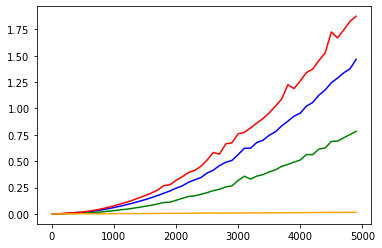

In [7]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    return [random.randint(0, 50000000) for _ in range(size)]

def simple_sort(arr: list) -> list:
    for i in range(len(arr)):
        for j in range(len(arr)):
            if arr[i] < arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

def insertion_sort(arr: list) -> list:
    for j in range(1, len(arr)):
        pivot = arr[j]
        i = j - 1
        while (i >= 0) and (arr[i] > pivot):
            arr[i + 1] = arr[i]
            i -= 1
        arr[i + 1] = pivot
    return arr

def selection_sort(arr: list) -> list:
    index = 0
    while index < len(arr):
        pivot = arr[index]
        j = index
        smallest = arr[j]
        smallest_index = j
        while j < len(arr):
            if arr[j] < smallest:
                smallest = arr[j]
                smallest_index = j
            j += 1
        arr[index] = smallest
        arr[smallest_index] = pivot
        index += 1
    return arr

def measure_sort(array, sorting_algorithm):
    tmp_array = array[:]
    start = time.time()
    sorting_algorithm(tmp_array)
    return time.time() - start

def generate_running_times(max_size):
    selection_sort_rt = []
    insertion_sort_rt = []
    simple_sort_rt = []
    merge_sort_rt = []
    measurements = [
        selection_sort_rt,
        insertion_sort_rt,
        simple_sort_rt,
        merge_sort_rt
    ]
    sorting_algorithms = [
        selection_sort, 
        insertion_sort, 
        simple_sort, 
        merge_sort
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        for index, sorting_algorithm in enumerate(sorting_algorithms):
            measurements[index].append(measure_sort(array, sorting_algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(5000)

colors = ["blue", "green", "red", "orange"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

In the above graph:

* blue = selection sort
* green = insertion sort
* red = simple sort 
* orange = merge sort

As you can see merge sort performs the best, and by a lot.  That's because the running time for merge sort is _orders of magnitude faster_, asymptotically.  

Next, let's look at another sorting algorithm that typically gets used in industry, quick sort.  Quick sort is also a divide and conquer algorithm therefore it has a similar implementation:

In [21]:
import random
def quicksort(arr):
    if len(arr) == 1 or len(arr) == 0:
        return arr
    else:
        pivot = arr[0]
        less = []
        equal = []
        greater = []
        for elem in arr:
            if elem < pivot:
                less.append(elem)
            elif elem == pivot:
                equal.append(elem)
            else:
                greater.append(elem)
        return quicksort(less)+equal+quicksort(greater)

def test_quicksort():
    for _ in range(1000):
        array = [random.randint(0, 500) for _ in range(1000)]
        sorted_array = array[:]
        sorted_array.sort()
        assert quicksort(array) == sorted_array
        
test_quicksort()

Here the swap's and comparisons appear in one block so we'll just show the block and point to each.

```python
for elem in arr:
    if elem < pivot:
        less.append(elem)
    elif elem == pivot:
        equal.append(elem)
    else:
        greater.append(elem)
```

The flow of control of the if/elif/else are the comparisons, pretty obviously.  And the appends to the three different arrays the 'swaps'. That's because the pivot partitions the larger array into three seperate groups.  And then they all get 'glued' together in the return statement:

```python
return quicksort(less)+equal+quicksort(greater)
```

As you can see there is no explicit divide and conquer 'framework'. And we don't segregate the computational component and the sorting component.  It all just happens contiguously.  By doing 'less work' - fewer function calls, fewer iterations, and just less overall, quicksort is kind of like a very 'sparse' version of merge sort.  

Next, let's do a performance comparison between quick sort and merge sort:

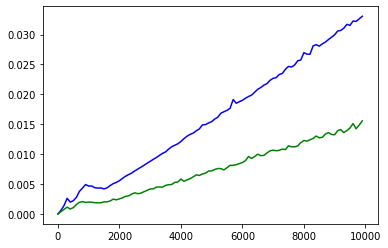

In [28]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    return [random.randint(0, 50000000) for _ in range(size)]

def measure_sort(array, sorting_algorithm):
    tmp_array = array[:]
    start = time.time()
    sorting_algorithm(tmp_array)
    return time.time() - start

def generate_running_times(max_size):
    merge_sort_rt = []
    quicksort_rt = []
    measurements = [
        merge_sort_rt,
        quicksort_rt
    ]
    sorting_algorithms = [
        merge_sort,
        quicksort
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        for index, sorting_algorithm in enumerate(sorting_algorithms):
            measurements[index].append(measure_sort(array, sorting_algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(10000)

colors = ["blue", "green"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

In the above graph:

* blue - merge sort
* green - quick sort

As you can see, quick sort is typically somewhat faster than merge sort.  Thus it is the most often used algorithm in industry.  That said, there are certain instances when merge sort will be faster.  These are subject to computation constraints, array specifics and other factors beyond the scope of this text.

Before we leave this section, let's talk a bit more about quick sort.  There is one line in the implementation that's important, that we did not talk about at all - the pivot.  We arbitrarily chose the front of the array.  But is that the best choice?  

Consider an array that is in reverse sorted order, if we always choose the first element as pivot then won't everything end up in less?  YUP.  So our 'partition' will always be _very lopsided_.  This means that quicksort will always perform kinda slow.  Let's see if it makes quick sort worse than merge sort:

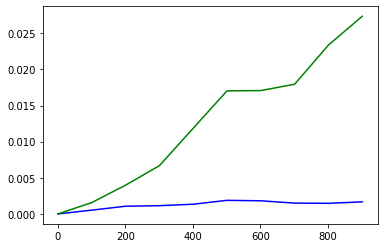

In [6]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    array = [random.randint(0, 50000000) for _ in range(size)]
    return sorted(array, reverse=True)

def measure_sort(array, sorting_algorithm):
    tmp_array = array[:]
    start = time.time()
    sorting_algorithm(tmp_array)
    return time.time() - start

def generate_running_times(max_size):
    merge_sort_rt = []
    quicksort_rt = []
    measurements = [
        merge_sort_rt,
        quicksort_rt
    ]
    sorting_algorithms = [
        merge_sort,
        quicksort
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        for index, sorting_algorithm in enumerate(sorting_algorithms):
            measurements[index].append(measure_sort(array, sorting_algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(1000)

colors = ["blue", "green"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

In the above graph:

* blue - merge sort
* green - quick sort

As you can see, quick sort does _way worse_.  This is because of the problem we talked about.  So our choice of partition matters _a lot_.  What can we do about this?  How can we change the pivot to always give us a good split?  One naive approach for improvement would be to choose a random pivot:

In [20]:
import random

def random_quicksort(arr):
    if len(arr) == 1 or len(arr) == 0:
        return arr
    else:
        pivot = random.choice(arr)
        less = []
        equal = []
        greater = []
        for elem in arr:
            if elem < pivot:
                less.append(elem)
            elif elem == pivot:
                equal.append(elem)
            else:
                greater.append(elem)
        return random_quicksort(less)+equal+random_quicksort(greater)

def test_random_quicksort():
    for _ in range(1000):
        array = [random.randint(0, 500) for _ in range(1000)]
        sorted_array = array[:]
        sorted_array.sort()
        assert random_quicksort(array) == sorted_array
        
test_random_quicksort()

This at least will do better than choosing the first element when the array is reverse sorted.  In fact, the chance of that happening is something we can calculate!  We can use binomial random variable to help us figure this out since the choice of the pivot will now be independent and there will be N trials!  

Our formula for the binomial random variable is:

$$ {n \choose k} p^{k} * q^{n - k} $$

Now there will be $log\text{ }n$ calls on average to `quicksort` and there will be a $\frac{1}{r}$ probability that the first element is chosen as the pivot.  Here $r$ is the size of the subarray being considered for the recursive call.

Thus the updated formula will be:

$$ {log\text{ }n \choose 1} \frac{1}{r} * \frac{(r-1)^{n - 1}}{r^{n - 1}} $$

For the probability of choosing _any_ given position for any call to `quicksort` during sorting.

Since the size of the array is variable in general, we can't _really_ say better than that.  It would be pretty tough to predict the split of _each_ sub array.  So unfortunately this is the best we can do from an analysis perspective.

There is one final point worth bringing up - how did we know that there would be $log\text{ }n$ splits on average?  Let's remind ourselves of what the logarithm function stands for - repeated division:

In [8]:
def logarithm(base, result):
    counter = 0
    while result > 1:
        result /= base
        counter += 1
    return counter

As you can see, the log just repeatedly divides the base into the number.  So for instance:

In [9]:
logarithm(2, 100)

7

This is because $2^{7} \approx 100$.  Remember - the above implementation is the _integer logarithm algorithm_.  So when we are dealing with real numbers it doesn't _exactly_ work.  For instance, if we look at $2^{7}$ in the reals:

In [11]:
2**7

128

So we are definitely _off_.  But the above gets us the idea we are after - the logarithm is _repeated_ division.  That's why we can use it to approximate the number of calls that quicksort will make to itself recursively - at each stage we divide the array into two subarrays, so $log_{2}$ _accurately_ depicts what's going on.  In particular, it tells us how many function calls we can expect _always_ because we are always just dividing base 2.  Yea, the number of recursive calls is variable, but that's okay, that's why we are dealing with a function!

$$ f(x) = log_{2} x $$

So we can just plug in x for the initial size of our array and we will always get back something _approximately_ correct!  This does assume our choice in pivot is reasonable.  For this we just need to look at the central tendency of a set of random numbers.  Our candidates for that are the arthimetic mean which is defined by this formula -

$$ \frac{1}{N}\sum_{i=0}^{n} i$$

And the median which is just the middle number of a sorted array.  Let's calculate how different the mean and the median are for a set of random numbers:

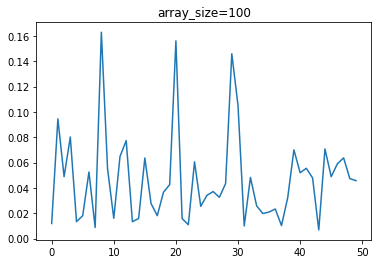

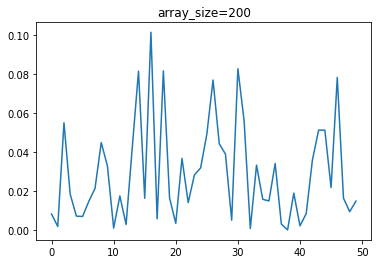

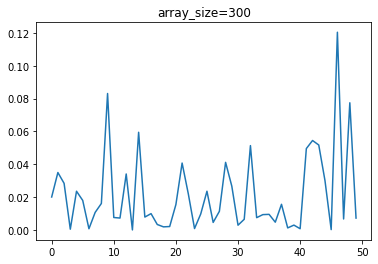

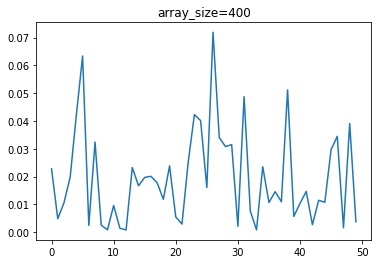

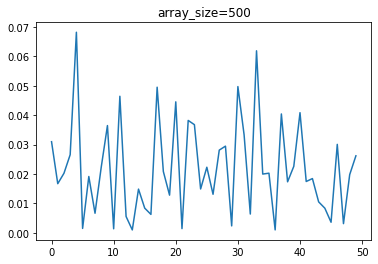

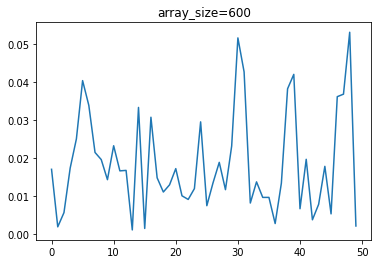

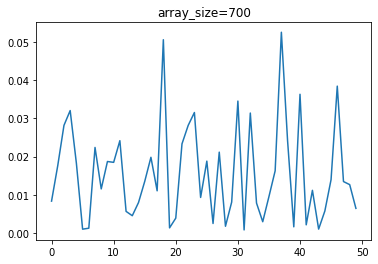

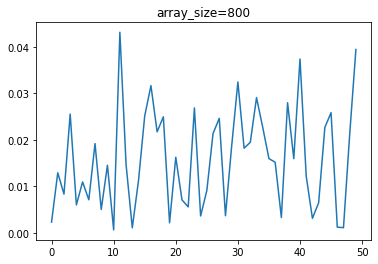

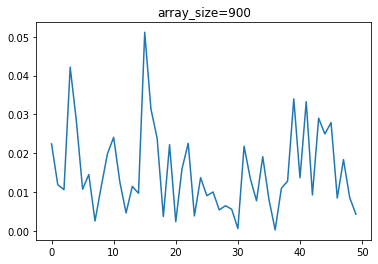

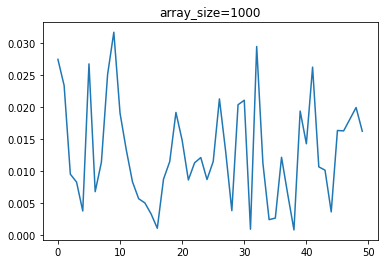

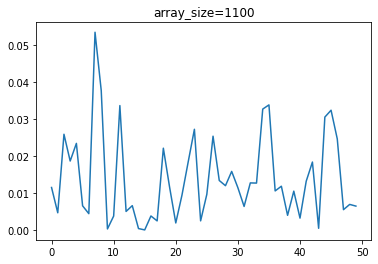

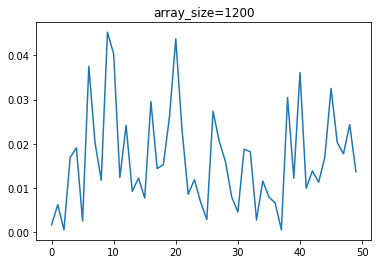

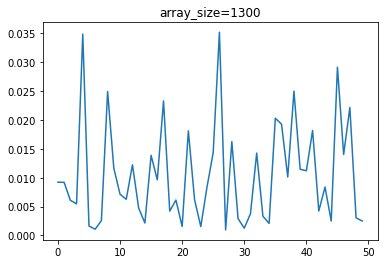

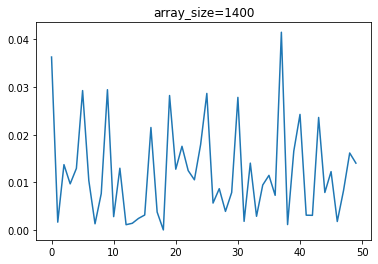

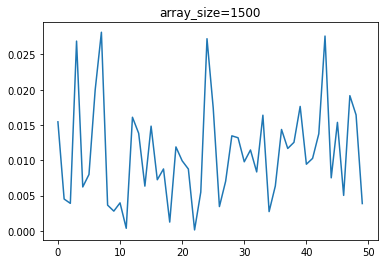

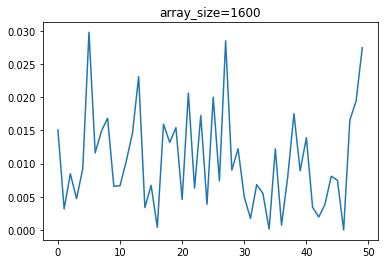

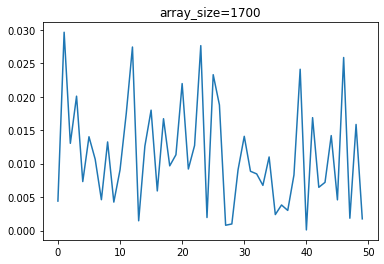

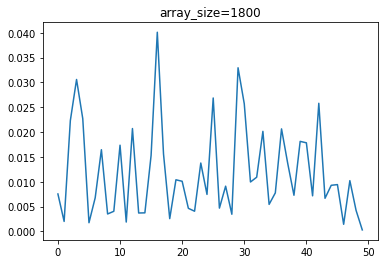

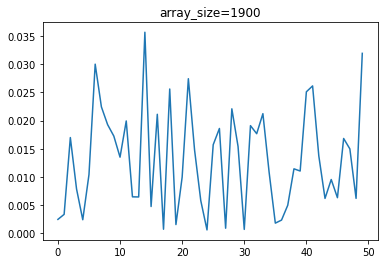

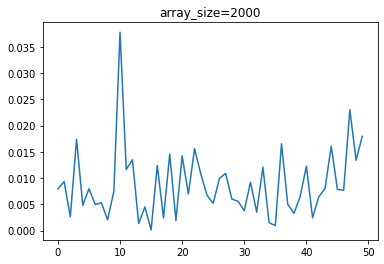

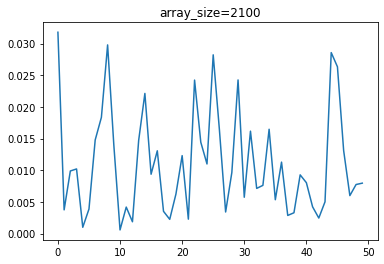

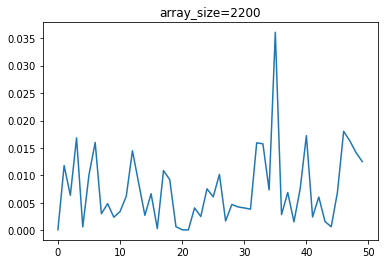

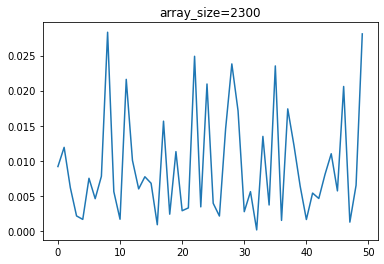

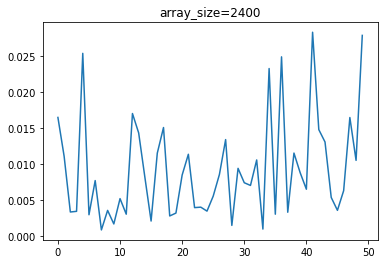

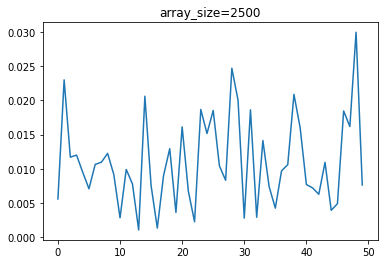

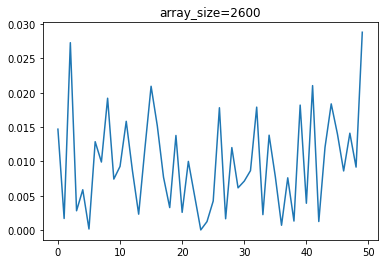

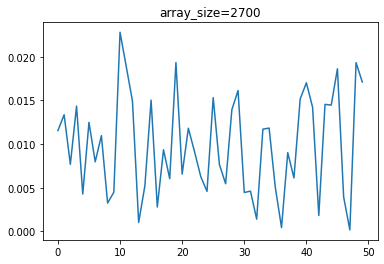

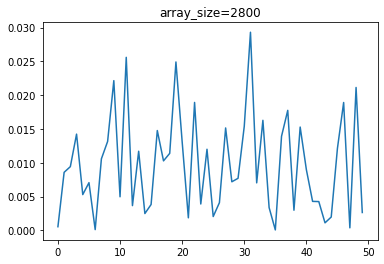

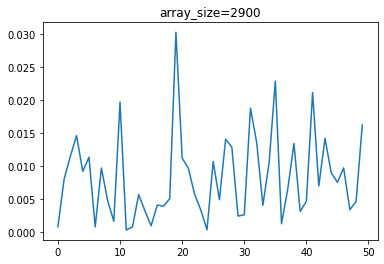

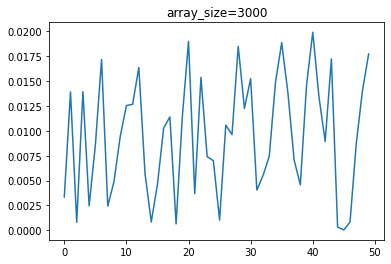

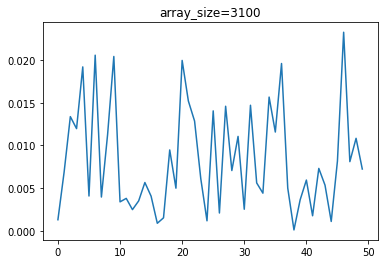

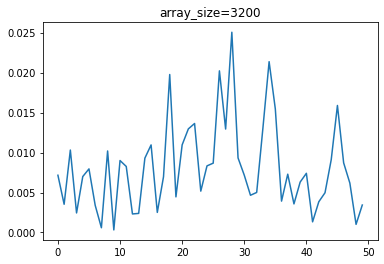

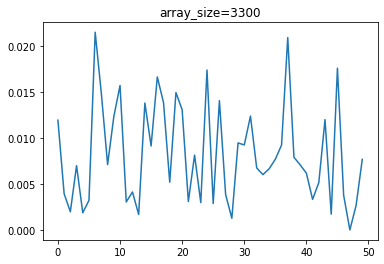

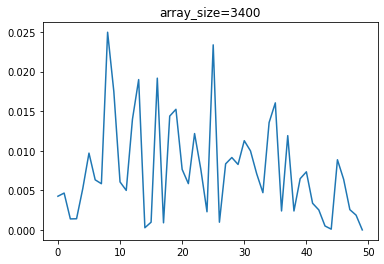

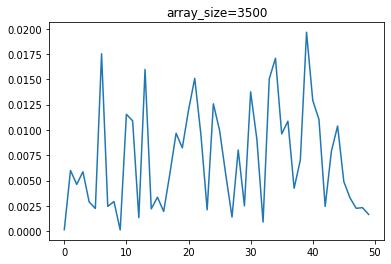

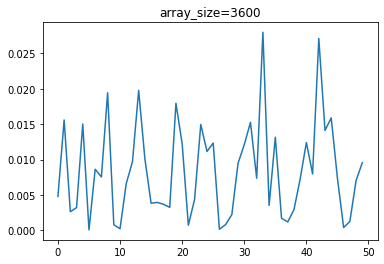

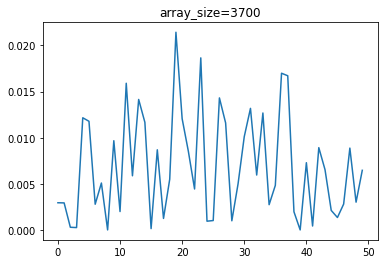

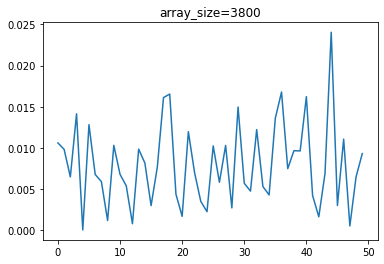

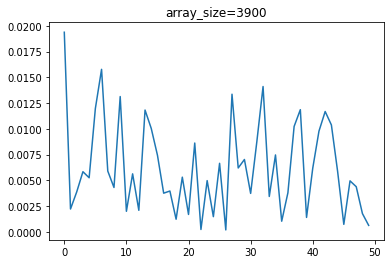

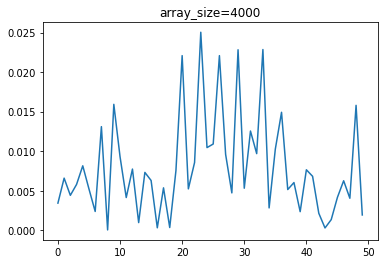

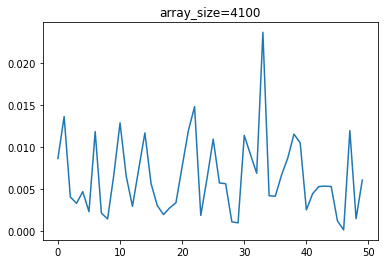

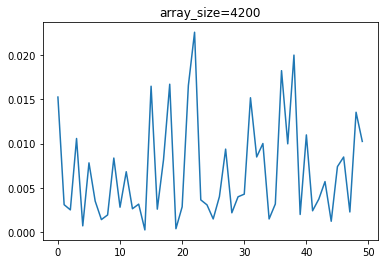

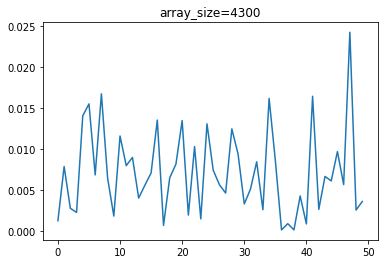

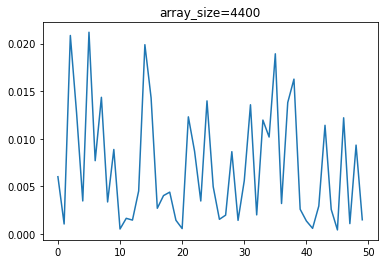

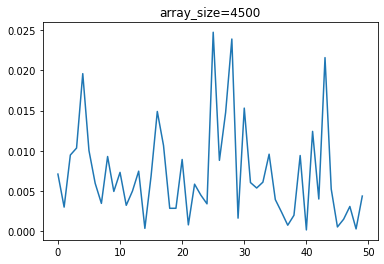

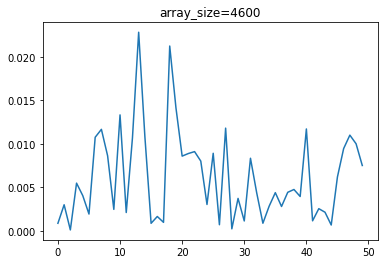

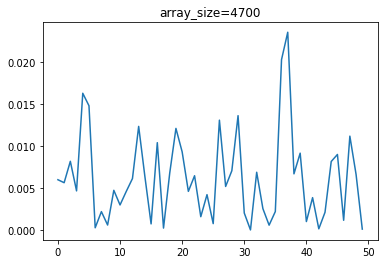

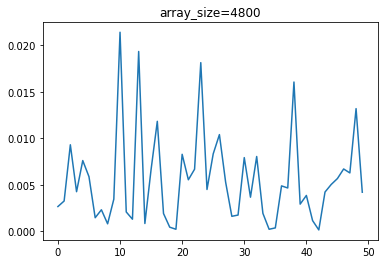

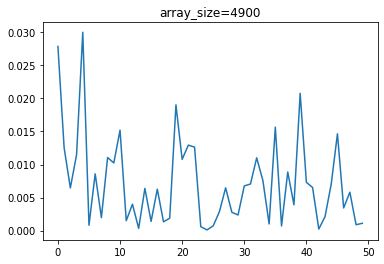

In [17]:
import random
import statistics
import math
import matplotlib.pyplot as plt

def generate_array(size):
    return [random.randint(0, 50000000) for _ in range(size)]

def mean(array):
    return sum(array)/len(array)

def calculate_bias(max_size, num_trials):
    sizes = {}
    for size in range(100, max_size, 100):
        sizes[size] = []
        for trial in range(num_trials):
            array = generate_array(size)
            sizes[size].append(
                abs(mean(array) - statistics.median(array))/statistics.median(array)
            )
    return sizes

max_size = 5000
num_trials = 50
trials = calculate_bias(max_size, num_trials)

for trial_set in trials:
    x = list(range(num_trials))
    plt.plot(x, trials[trial_set])
    plt.title(f"array_size={trial_set}")
    plt.show()

In the above calculation you may be wondering about - 

```python
abs(mean(array) - statistics.median(array))/statistics.median(array)
```

Should we just take the absolute value of the difference?  Why do we need to account for the maximum element in the array?  The _reason_ we normalize by the median element in the random array is because the difference will be subject to the magnitude of the array.  We _could_ normalize by the max element but we want to allow for some of the bias in the mean to come through.  In general, it appears that the mean isn't that different an estimate when compared to the mean.  However, if we take away the normalizing factor, than we see that the two statistics give us a very different set of answers:

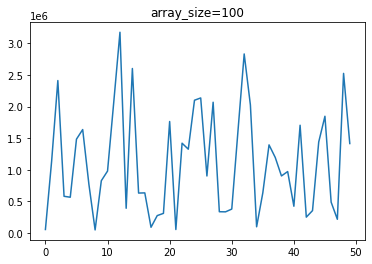

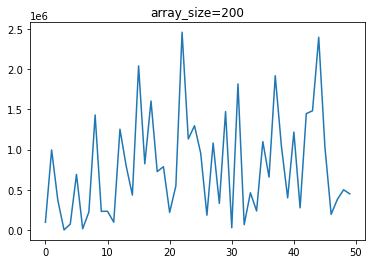

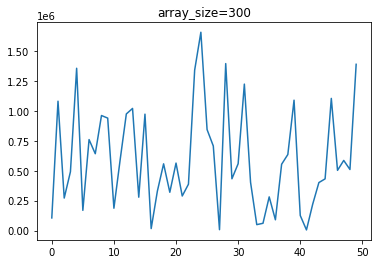

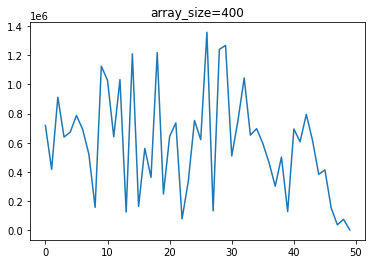

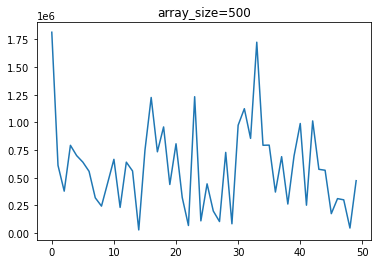

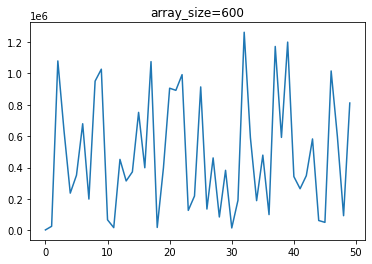

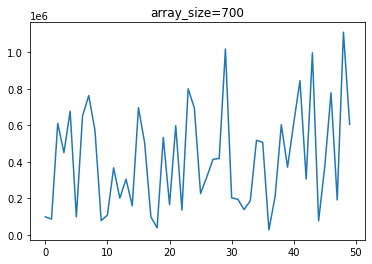

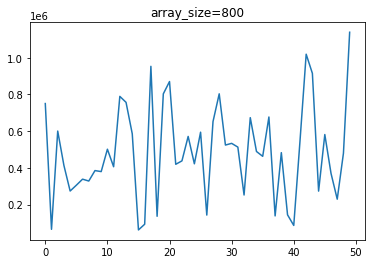

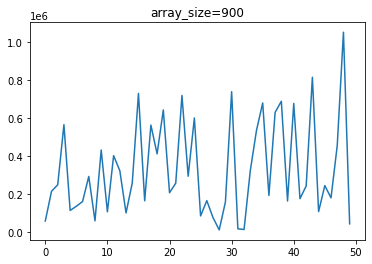

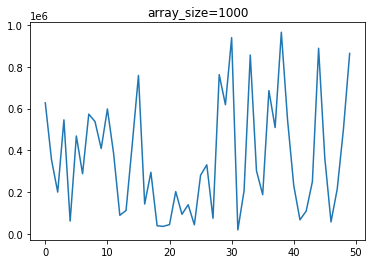

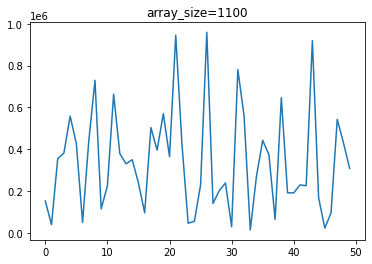

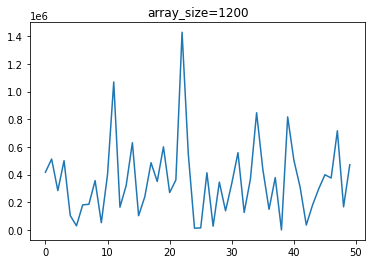

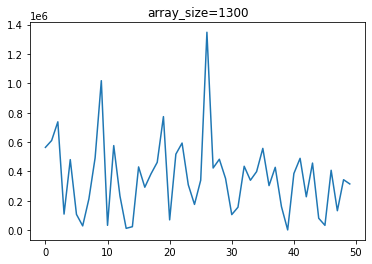

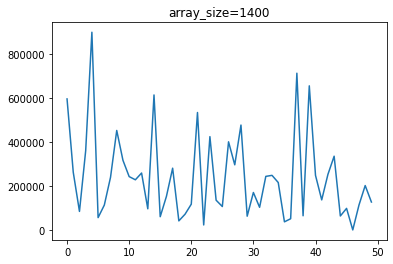

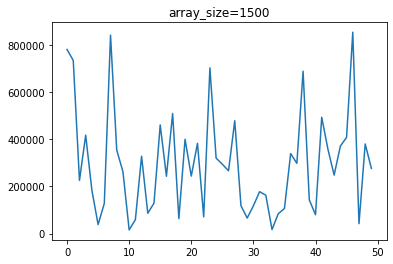

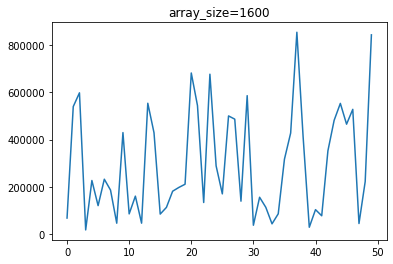

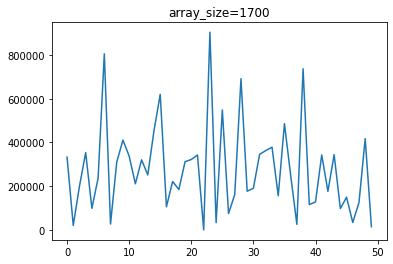

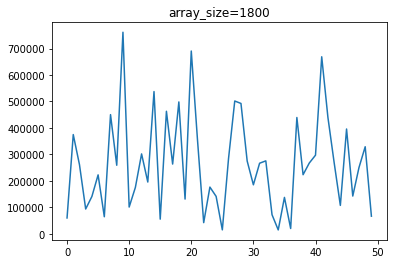

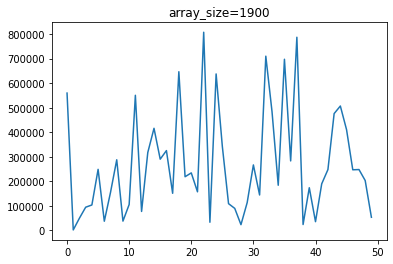

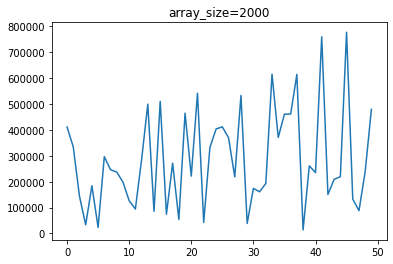

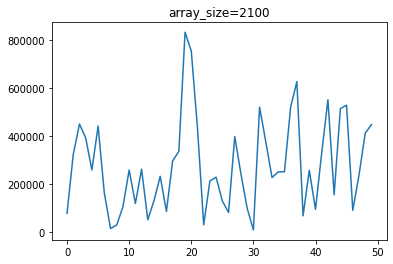

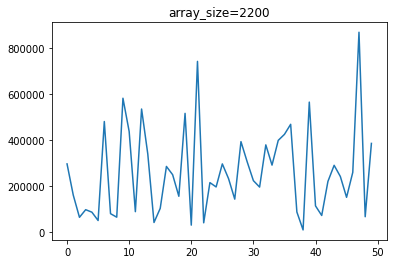

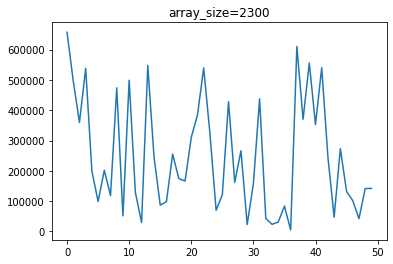

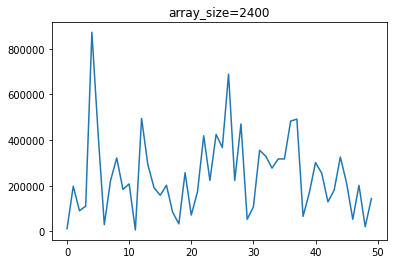

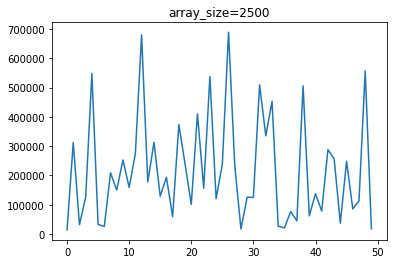

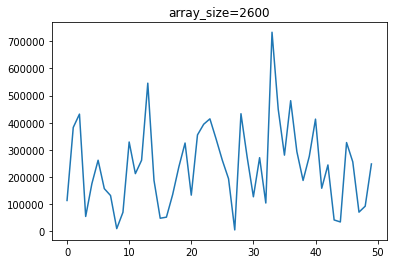

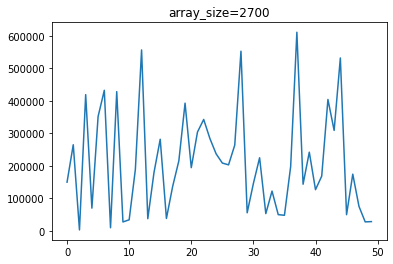

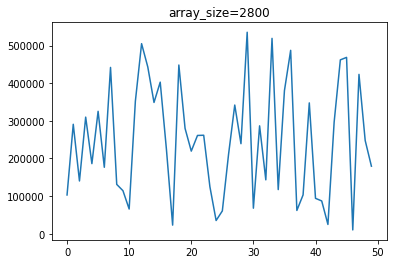

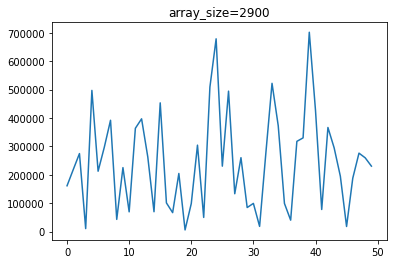

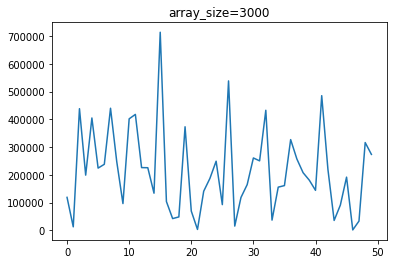

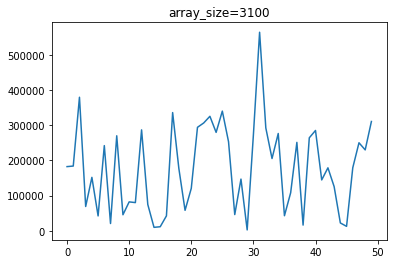

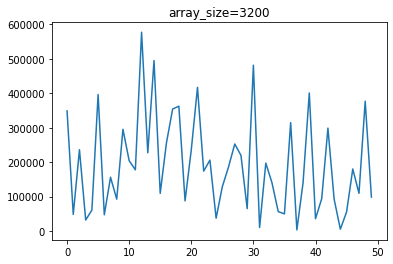

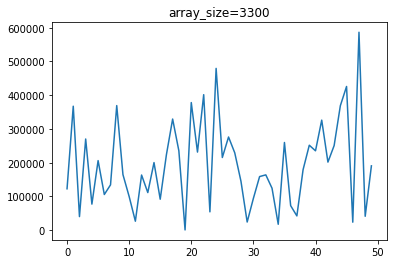

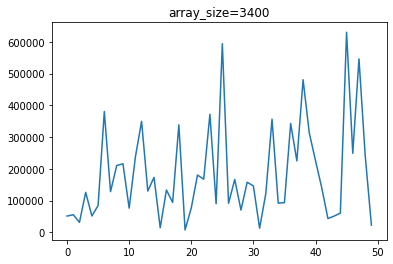

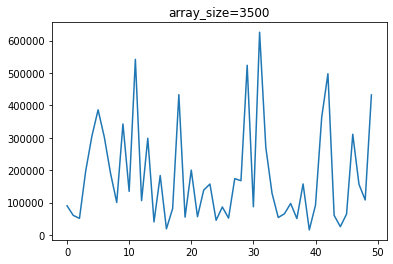

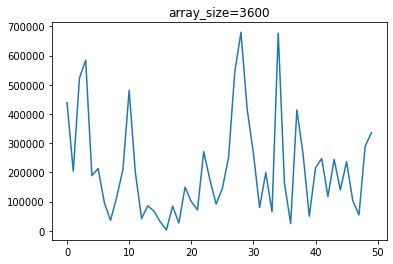

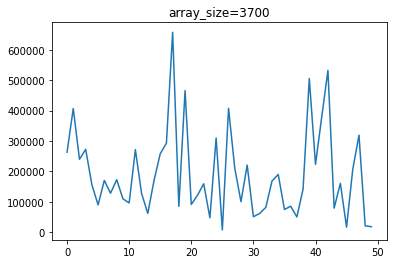

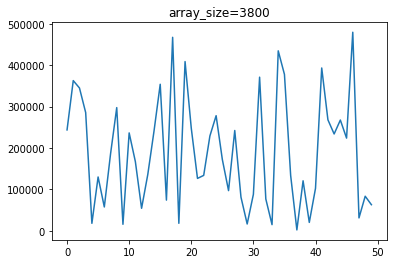

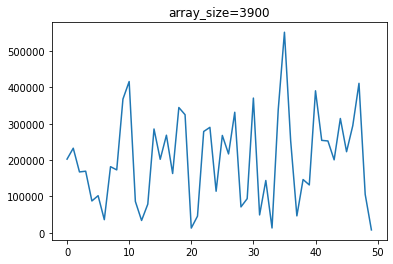

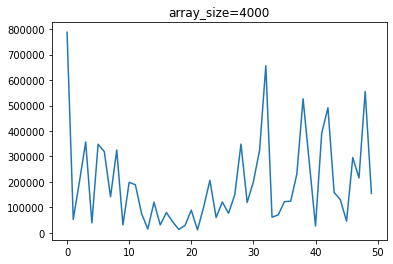

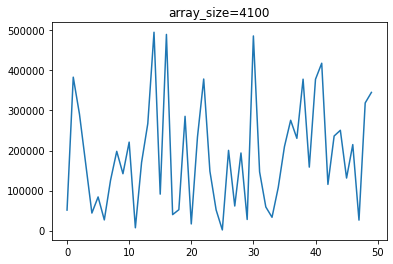

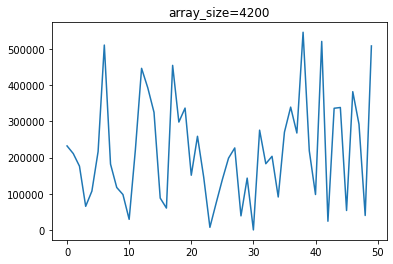

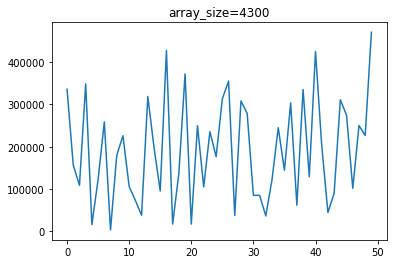

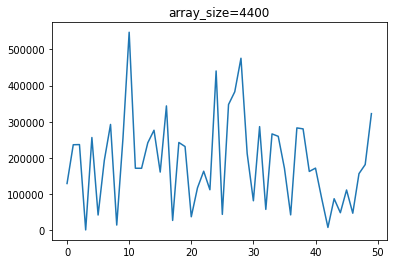

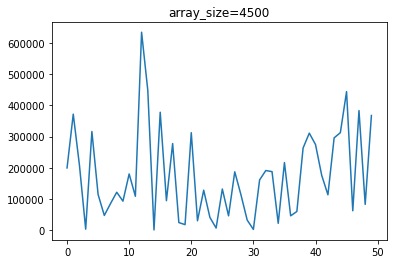

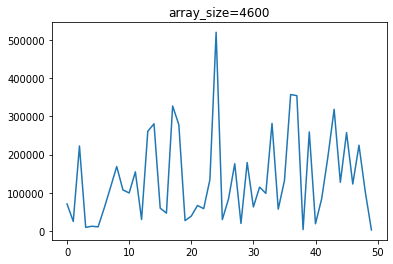

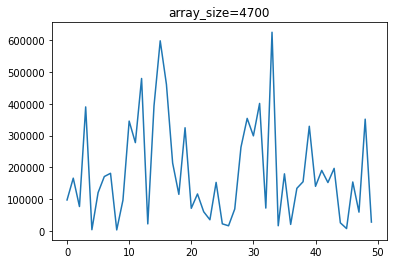

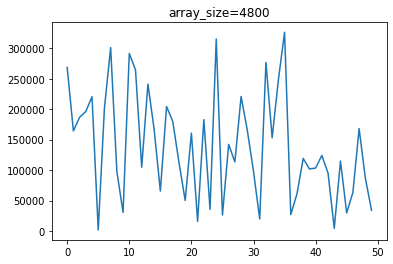

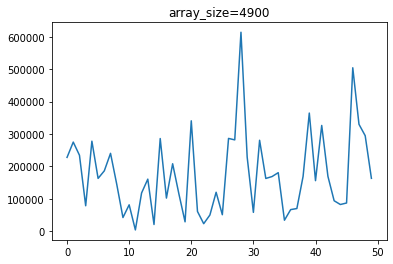

In [18]:
import random
import statistics
import math
import matplotlib.pyplot as plt

def generate_array(size):
    return [random.randint(0, 50000000) for _ in range(size)]

def mean(array):
    return sum(array)/len(array)

def calculate_bias(max_size, num_trials):
    sizes = {}
    for size in range(100, max_size, 100):
        sizes[size] = []
        for trial in range(num_trials):
            array = generate_array(size)
            sizes[size].append(
                abs(mean(array) - statistics.median(array))
            )
    return sizes

max_size = 5000
num_trials = 50
trials = calculate_bias(max_size, num_trials)

for trial_set in trials:
    x = list(range(num_trials))
    plt.plot(x, trials[trial_set])
    plt.title(f"array_size={trial_set}")
    plt.show()

This is _somewhat_ overstated because of the relatively large magnitude of the range of random numbers.  Suppose instead we restricted ourselves to arrays with a max value of 1000:

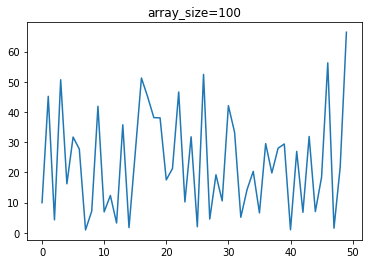

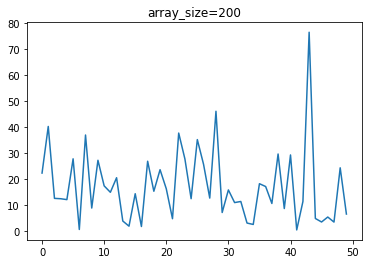

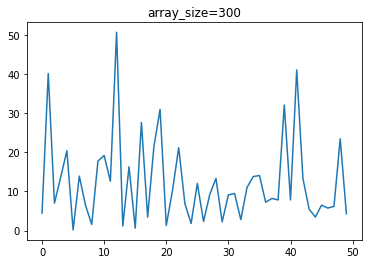

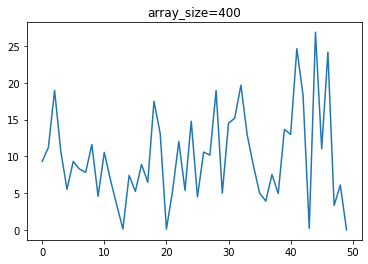

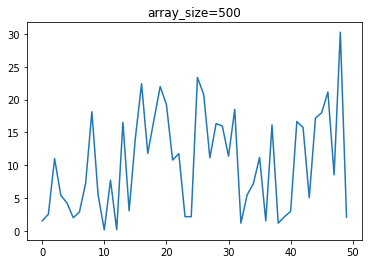

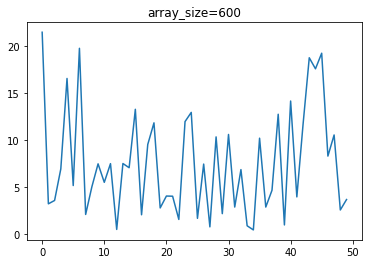

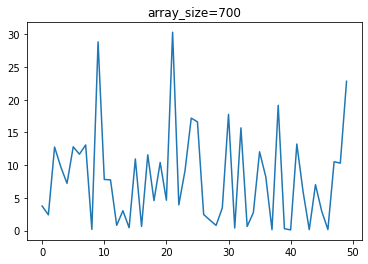

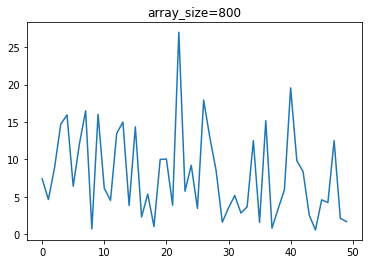

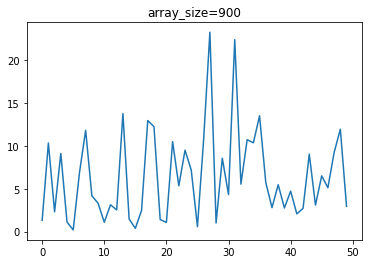

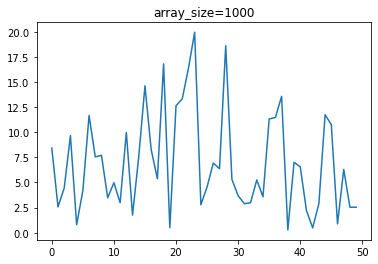

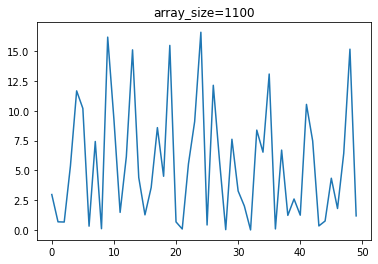

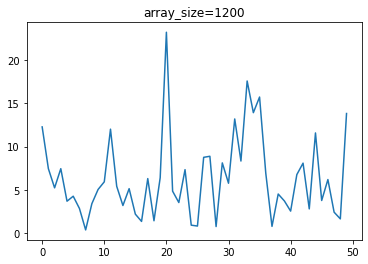

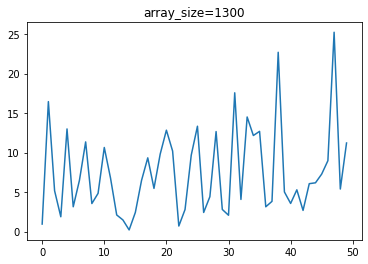

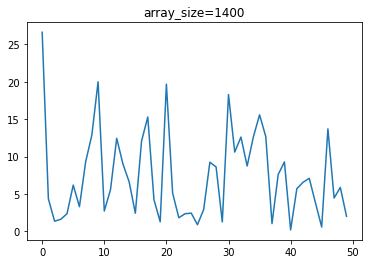

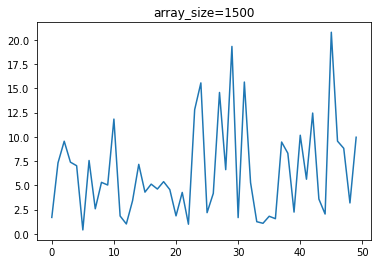

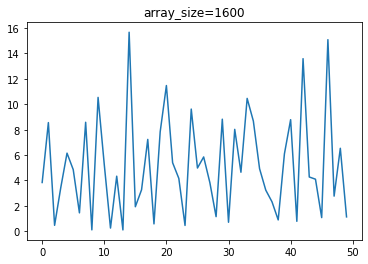

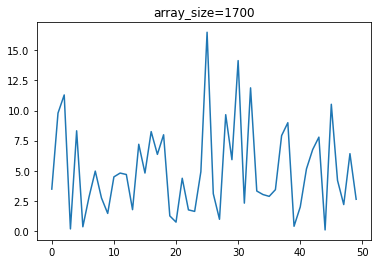

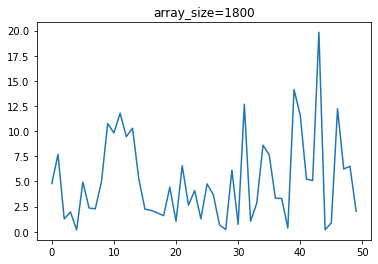

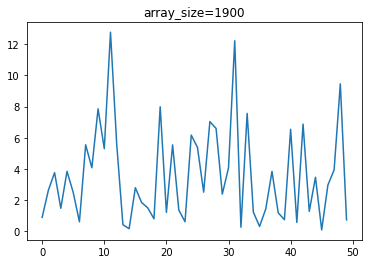

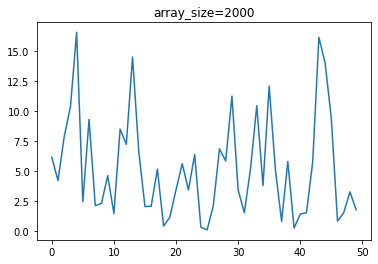

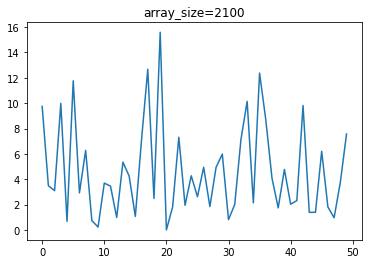

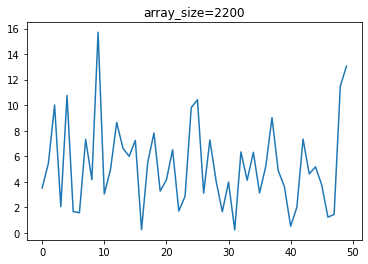

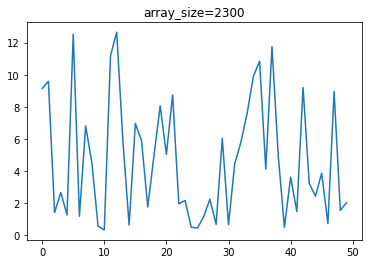

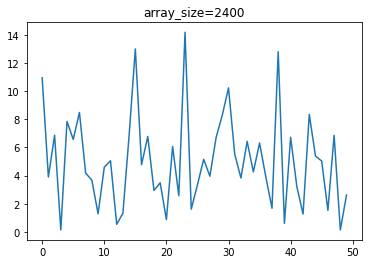

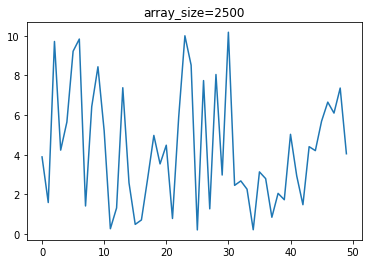

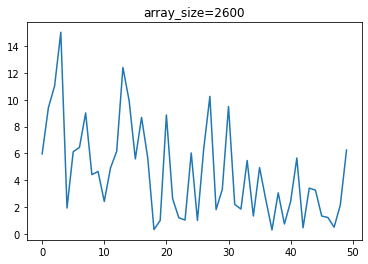

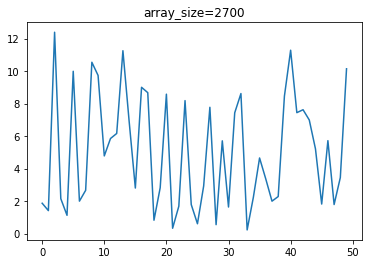

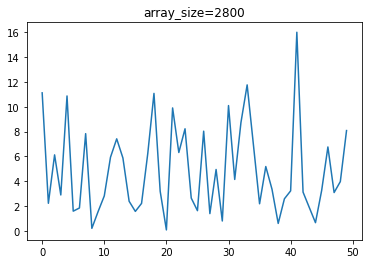

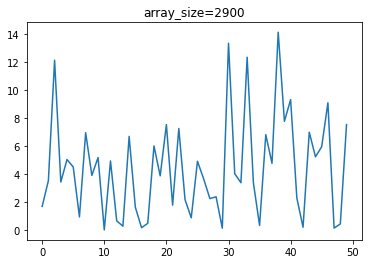

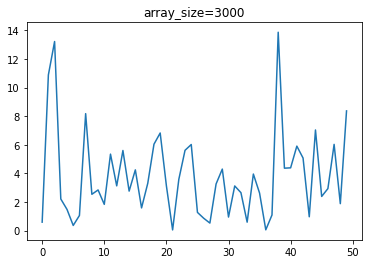

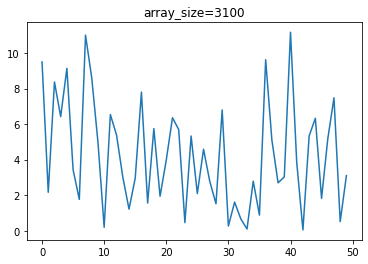

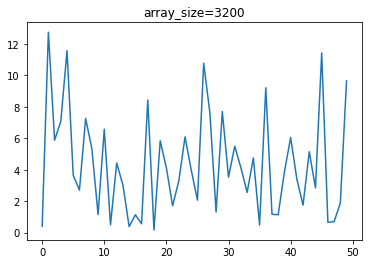

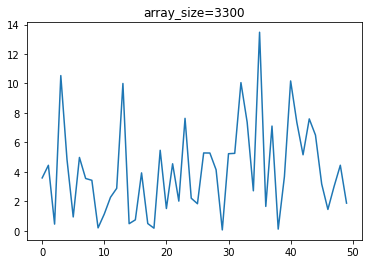

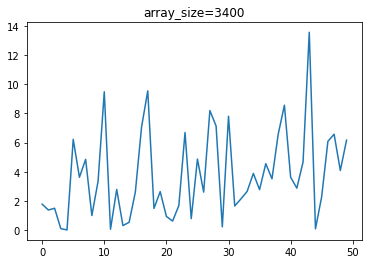

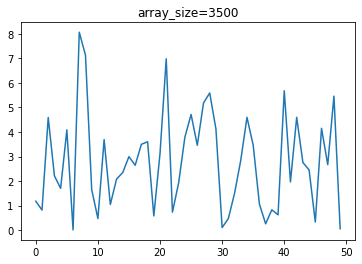

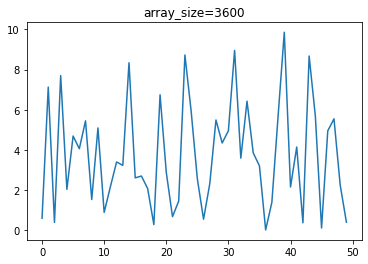

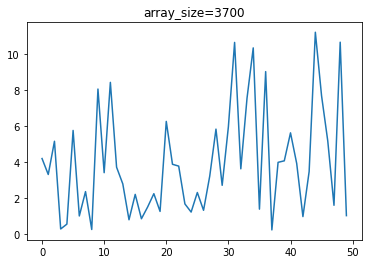

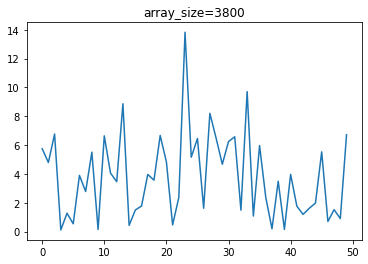

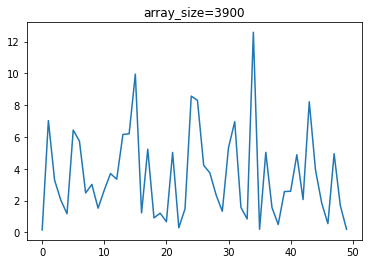

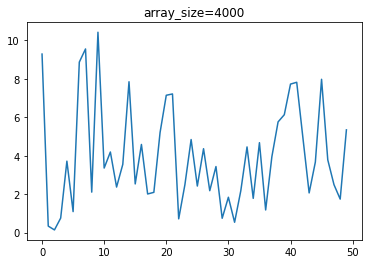

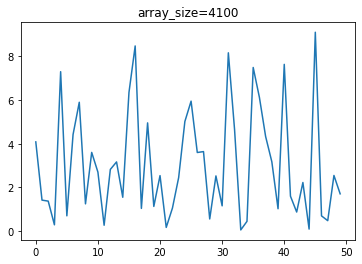

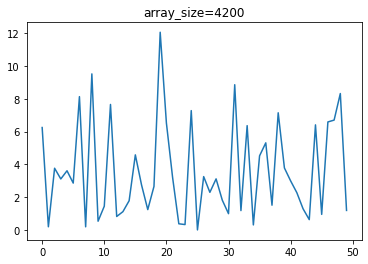

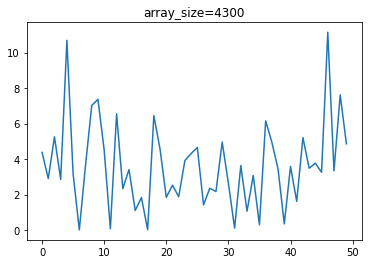

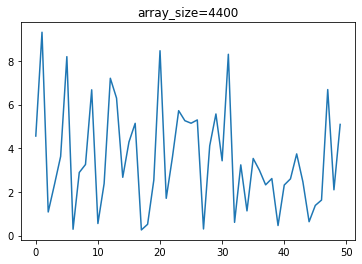

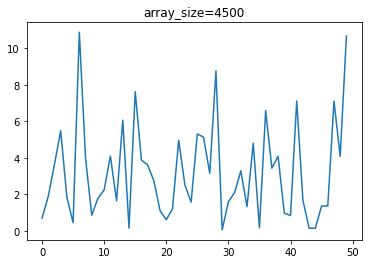

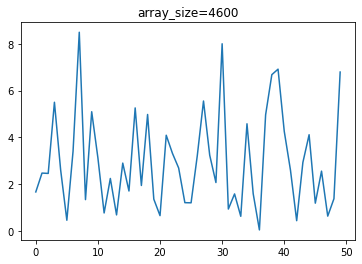

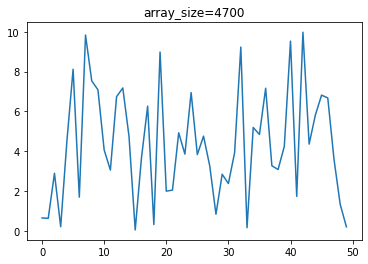

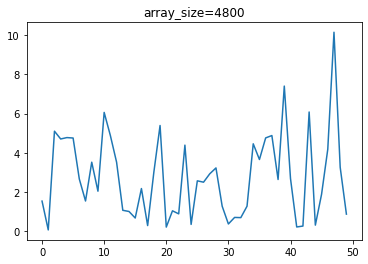

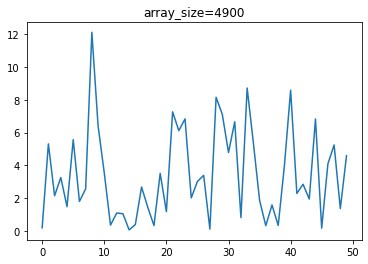

In [19]:
import random
import statistics
import math
import matplotlib.pyplot as plt

def generate_array(size):
    return [random.randint(0, 1000) for _ in range(size)]

def mean(array):
    return sum(array)/len(array)

def calculate_bias(max_size, num_trials):
    sizes = {}
    for size in range(100, max_size, 100):
        sizes[size] = []
        for trial in range(num_trials):
            array = generate_array(size)
            sizes[size].append(
                abs(mean(array) - statistics.median(array))
            )
    return sizes

max_size = 5000
num_trials = 50
trials = calculate_bias(max_size, num_trials)

for trial_set in trials:
    x = list(range(num_trials))
    plt.plot(x, trials[trial_set])
    plt.title(f"array_size={trial_set}")
    plt.show()

As you can see, we are off by _some_ consistently and the exact amount is pretty random.  But it's not _terrible_ for small values.  Thus the mean is a reasonable _estimate_.  So let's use that as a first approximation for our random pivot:

We should expect a speed up of for an array that is reverse sorted:

$$ log_{2} \text{ }\frac{n}{2} $$

Let's see how it compares in general to quick sort:

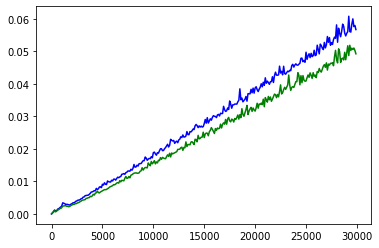

In [23]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    return [random.randint(0, 50000000) for _ in range(size)]

def measure_sort(array, sorting_algorithm):
    tmp_array = array[:]
    start = time.time()
    sorting_algorithm(tmp_array)
    return time.time() - start

def generate_running_times(max_size):
    random_quicksort_rt = []
    quicksort_rt = []
    measurements = [
        random_quicksort_rt,
        quicksort_rt
    ]
    sorting_algorithms = [
        random_quicksort,
        quicksort
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        for index, sorting_algorithm in enumerate(sorting_algorithms):
            measurements[index].append(measure_sort(array, sorting_algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(30000)

colors = ["blue", "green"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

For this graph:

* blue is random quick sort
* green is original quick sort

Looks like it runs a little slower than the original quick sort, when we are dealing with random elements.  Now let's look at reverse sorted arrays:

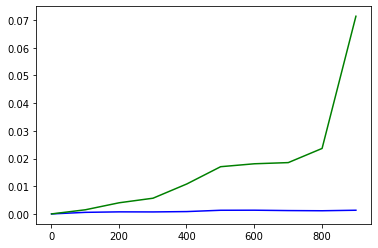

In [25]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    array = [random.randint(0, 50000000) for _ in range(size)]
    return sorted(array, reverse=True)

def measure_sort(array, sorting_algorithm):
    tmp_array = array[:]
    start = time.time()
    sorting_algorithm(tmp_array)
    return time.time() - start

def generate_running_times(max_size):
    random_quicksort_rt = []
    quicksort_rt = []
    measurements = [
        random_quicksort_rt,
        quicksort_rt
    ]
    sorting_algorithms = [
        random_quicksort,
        quicksort
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        for index, sorting_algorithm in enumerate(sorting_algorithms):
            measurements[index].append(measure_sort(array, sorting_algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(1000)

colors = ["blue", "green"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

For this graph:

* blue is random quick sort
* green is original quick sort

As you can see, the original does _much much_ worse when the array is in reverse sorted order.  Since it only does slightly worse when things are pretty random, overall the random pivot is definitely an improvement.  But can we do better?  Well, we saw that the mean is a biased estimator, and our choice of random number is probably better approximated in its typical behavior by the mean than the median since the mean captures more of the skew of the distribution.  So how can we limit this skew factor to create more even splits?  We _could_ select the middle number.  But doesn't that require a sorted array?

Let's start investigating how we can intelligently select elements from an array.  By understanding selection and how to make it efficient, we can pick a better pivot.

Let's begin with a naive selection algorithm:

In [36]:
import statistics

def generate_array(size):
    return [i for i in range(size)]

def find_middle(array):
    return array[len(array)//2]

def test_find_middle():
    array = generate_array(501)
    assert find_middle(array) == 250
    array = generate_array(502)
    assert find_middle(array) == 251
    
        
test_find_middle()

Not bad!  We find the middle number of a sorted array in _constant time_.  Does this hold up with repeated numbers?

In [37]:
def generate_array(size):
    return [i for i in range(size)] + [size-1]

def find_middle(array):
    return array[len(array)//2]

def test_find_middle():
    array = generate_array(501)
    assert find_middle(array) == 251
    array = generate_array(502)
    assert find_middle(array) == 252
    
        
test_find_middle()

AssertionError: 

Nope!  This algorithm only works on that simple case.  Let's move onto something more sophisticated that actually searches for the middle number:

In [46]:
def binary_search(array, element):
    mid_point = len(array)//2
    if array[mid_point] == element:
        return element
    elif array[mid_point] < element:
        binary_search(array[:mid_point], element)
        binary_search(array[mid_point:], element)

binary_search([1,2,3,4,5], 3)

3

Another way we could search for an element in an array is with:

In [47]:
3 in [1,2,3,4,5]

True

However the built-in `in` operator that comes with python runs in linear time.  Let's compare the `in` with our `binary_search` function:

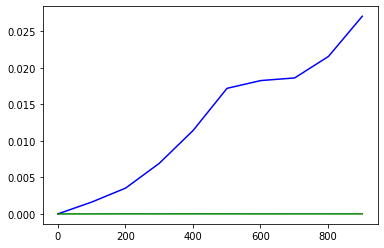

In [48]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    array = [random.randint(0, 50000000) for _ in range(size)]
    return sorted(array, reverse=True)

def binary_find(array, element):
    array = quicksort(array)
    try:
        binary_search(array, element)
        return True
    except:
        return False
    
def linear_find(array, element):
    return element in array

def measure_sort(array, algorithm):
    tmp_array = array[:]
    random_index = random.randint(0, len(array)-1)
    start = time.time()
    random_element = array[random_index]
    algorithm(tmp_array, random_element)
    return time.time() - start

def generate_running_times(max_size):
    binary_find_rt = []
    linear_find_rt = []
    measurements = [
        binary_find_rt,
        linear_find_rt
    ]
    algorithms = [
        binary_find,
        linear_find
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        for index, algorithm in enumerate(algorithms):
            measurements[index].append(measure_sort(array, algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(1000)

colors = ["blue", "green"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

Here is the graph:

* blue is binary search
* green is linear search 

Let's see what happens if we take the sorting out of the binary search:

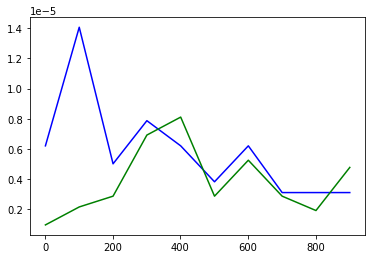

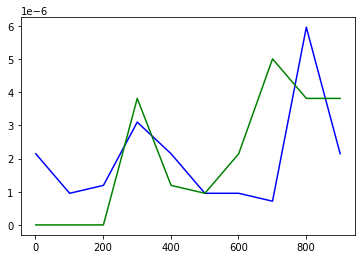

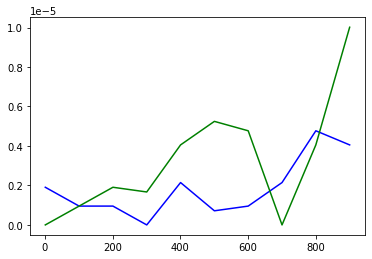

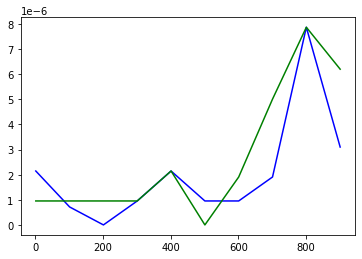

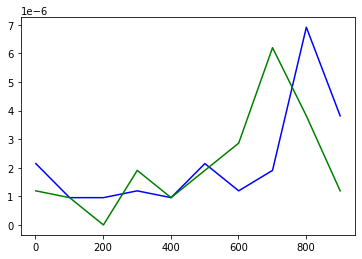

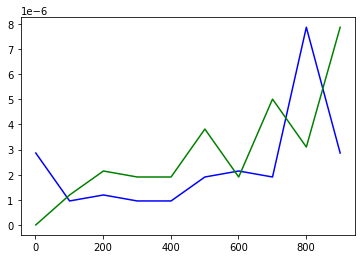

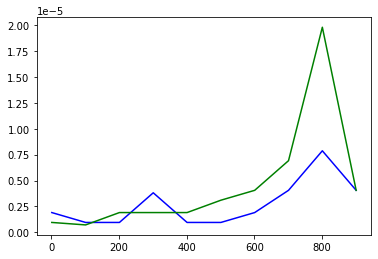

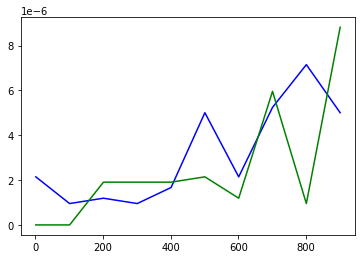

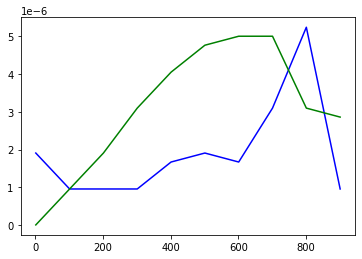

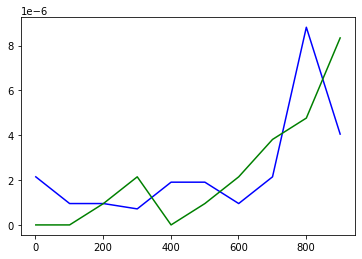

In [153]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    array = [random.randint(0, 50000000) for _ in range(size)]
    return sorted(array, reverse=True)

def binary_find(array, element):
    try:
        binary_search(array, element)
        return True
    except:
        return False
    
def linear_find(array, element):
    return element in array

def measure_sort(array, algorithm):
    tmp_array = array[:]
    random_index = random.randint(0, len(array)-1)
    start = time.time()
    random_element = array[random_index]
    algorithm(tmp_array, random_element)
    return time.time() - start

def generate_running_times(max_size):
    binary_find_rt = []
    linear_find_rt = []
    measurements = [
        binary_find_rt,
        linear_find_rt
    ]
    algorithms = [
        binary_find,
        linear_find
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        array = quicksort(array)
        for index, algorithm in enumerate(algorithms):
            measurements[index].append(measure_sort(array, algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
for _ in range(10):
    x, ys = generate_running_times(1000)
    colors = ["blue", "green"]
    for color_index, y in enumerate(ys):
        plt.plot(x, y, color=colors[color_index])
    plt.show()

Here as before:

* blue is binary search
* green is linear search

Once we take out the sorting algorithm binary search does better as we scale up the size of the array.  Let's see if what happens as we increase the size:

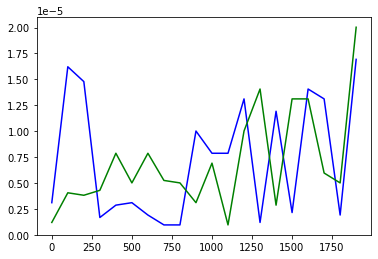

In [52]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    array = [random.randint(0, 50000000) for _ in range(size)]
    return sorted(array, reverse=True)

def binary_find(array, element):
    try:
        binary_search(array, element)
        return True
    except:
        return False
    
def linear_find(array, element):
    return element in array

def measure_sort(array, algorithm):
    tmp_array = array[:]
    random_index = random.randint(0, len(array)-1)
    start = time.time()
    random_element = array[random_index]
    algorithm(tmp_array, random_element)
    return time.time() - start

def generate_running_times(max_size):
    random_quicksort_rt = []
    quicksort_rt = []
    measurements = [
        random_quicksort_rt,
        quicksort_rt
    ]
    algorithms = [
        binary_find,
        linear_find
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        array = quicksort(array)
        for index, algorithm in enumerate(algorithms):
            measurements[index].append(measure_sort(array, algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(2000)

colors = ["blue", "green"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

If you keep increasing the graph.  It looks like the gains we saw from binary search more or less dispate.  If we continue to extend this trend to arrays of size 10000 we see:

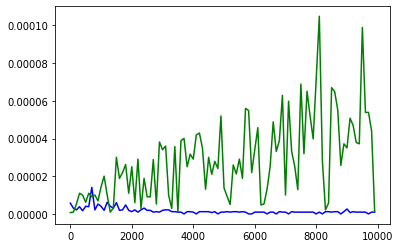

In [63]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    array = [random.randint(0, 50000000) for _ in range(size)]
    return sorted(array, reverse=True)

def binary_find(array, element):
    try:
        binary_search(array, element)
        return True
    except:
        return False
    
def linear_find(array, element):
    return element in array

def measure_sort(array, algorithm):
    tmp_array = array[:]
    random_index = random.randint(0, len(array)-1)
    start = time.time()
    random_element = array[random_index]
    algorithm(tmp_array, random_element)
    return time.time() - start

def generate_running_times(max_size):
    binary_find_rt = []
    linear_find_rt = []
    measurements = [
        binary_find_rt,
        linear_find_rt
    ]
    algorithms = [
        binary_find,
        linear_find
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        array.sort()
        for index, algorithm in enumerate(algorithms):
            measurements[index].append(measure_sort(array, algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(10000)

colors = ["blue", "green"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

In the above graph:
* blue is binary search
* green is linear search 

As you can see, once we get to a large enough scale, the binary search absolutely and definitively out performs the linear search.  Let's see what happens if we add sorting back into the algorithm - will binary search still win out?

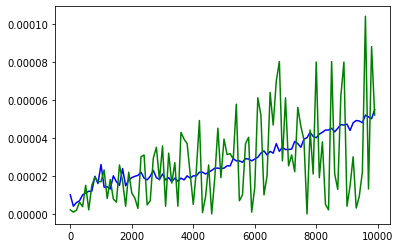

In [64]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    array = [random.randint(0, 50000000) for _ in range(size)]
    return sorted(array, reverse=True)

def binary_find(array, element):
    array.sort()
    try:
        binary_search(array, element)
        return True
    except:
        return False
    
def linear_find(array, element):
    return element in array

def measure_sort(array, algorithm):
    tmp_array = array[:]
    random_index = random.randint(0, len(array)-1)
    start = time.time()
    random_element = array[random_index]
    algorithm(tmp_array, random_element)
    return time.time() - start

def generate_running_times(max_size):
    binary_find_rt = []
    linear_find_rt = []
    measurements = [
        binary_find_rt,
        linear_find_rt
    ]
    algorithms = [
        binary_find,
        linear_find
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        for index, algorithm in enumerate(algorithms):
            measurements[index].append(measure_sort(array, algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(10000)

colors = ["blue", "green"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

The colors haven't changed from the last graph so:

* blue is binary search
* green is linear search

As you can see, the gains are definitely _less_ pronounced.  But clearly binary search still performs better at least half the time.  Linear search is significantly more choatic as the number of elements increases.  But now there is a clear linear increase in running time because of the added sorting prior to searching.  Overall, not a bad candidate from a performance perspective.  But needing to sort the elements ahead of time just doesn't seem like a good idea for use within quicksort.

Our next candidate will be the median.  If we could calculate the median then, we could always choose the 'middle number' which would mean we always do a best choice split.

Let's begin by reviewing how we can get the minimum and maximum of a list:

In [67]:
import random

def minimum(array):
    _min = array[0]
    for element in array[1:]:
        if element < _min:
            _min = element
    return _min

def maximum(array):
    _max = array[0]
    for element in array[1:]:
        if element > _max:
            _max = element
    return _max

def test_minimum():
    for _ in range(1000):
        array = [random.randint(0, 5000000) for _ in range(1000)]
        assert minimum(array) == min(array)

def test_maximum():
    for _ in range(1000):
        array = [random.randint(0, 5000000) for _ in range(1000)]
        assert maximum(array) == max(array)

test_minimum()
test_maximum()

This allows us to _linearly_ search an unsorted array for the least or greatest element, _regardless_ of position.  This means we know prior information and we don't need to sort our array ahead of time.  This sort of algorithm is called _on-line_ because we need to know prior informatio and can process 'on the line'.  The term 'on the line' is a reference to a factory assembly line.  And the array is sort of like the assembly line itself.  By processing on the line, really what we are saying is we look only once at the array during the single run and make our updates from there.

Now let's consider the generic case of trying to find the ith smallest element:

In [270]:
import random

def partition(arr, start, end):
    end_value = arr[end]
    index = start - 1
    for j in range(start, end):
        if arr[j] <= end_value:
            index += 1
            arr[index], arr[j] = arr[j], arr[index]
    arr[index+1],arr[end] = arr[end], arr[index+1]
    return index+1

def randomized_partition(arr, start, end):
    index = random.randint(start, end)
    arr[end], arr[index] = arr[index], arr[end]
    return partition(arr, start, end)

def _randomized_select(arr, start, end, index):
    if start == end:
        return arr[start]
    partition_index = randomized_partition(arr, start, end)
    if partition_index < 0:
        pivot = 0
    else:
        pivot = partition_index - start + 1
    if index == pivot:
        return arr[partition_index]
    elif index < pivot:
        return _randomized_select(
            arr, start, partition_index-1, index
        )
    else:
        return _randomized_select(
            arr, partition_index+1, end, index - pivot
        )

def randomized_select(arr, quantile):
    quantile = int(quantile * len(arr))
    return _randomized_select(arr, 1, len(arr)-1, quantile)

def test_randomized_select():
    arr = [random.randint(0, 5000000) for _ in range(501)]
    sorted_arr = arr[:]
    sorted_arr.sort()
    assert randomized_select(arr, 0.5) == sorted_arr[len(arr)//2]
    
test_randomized_select()

We'll have to delay the formal analysis of this algorithm until we introduce the necessary techniques to analyze a recursive algorithm's running time.  For now let's settle for an informal analysis via running time.

We can apply our `randomized_select` algorithm to quicksort.  Let's see if we do better than selecting a random element:

In [271]:
import random

def median_quicksort(arr):
    if len(arr) == 1 or len(arr) == 0:
        return arr
    else:
        pivot = randomized_select(arr, 0.5)
        less = []
        equal = []
        greater = []
        for elem in arr:
            if elem < pivot:
                less.append(elem)
            elif elem == pivot:
                equal.append(elem)
            else:
                greater.append(elem)
        return median_quicksort(less)+equal+median_quicksort(greater)
    
def test_median_quicksort():
    for _ in range(1000):
        array = [random.randint(0, 500) for _ in range(1000)]
        sorted_array = array[:]
        sorted_array.sort()
        assert median_quicksort(array) == sorted_array
        
test_median_quicksort()

In order to clean up the code on measuring the running time of different algorithms we will introduce a concept called a decorator.  Let's look at the implementation:

In [230]:
import time

def calculate_time(function):
    def inner(*args, **kwargs):
        start = time.time()
        function(*args, **kwargs)
        return time.time() - start
    return inner

def sample_function(arr):
    return len(arr)

timed = calculate_time(sample_function)
timed([1,2,3])

2.86102294921875e-06

Now we can apply calculate time directly to our sorts which will clean up the code for measuring running times significantly:

In [272]:
import random

def median_quicksort(arr):
    if len(arr) == 1 or len(arr) == 0:
        return arr
    else:
        pivot = randomized_select(arr, 0.5)
        less = []
        equal = []
        greater = []
        for elem in arr:
            if elem < pivot:
                less.append(elem)
            elif elem == pivot:
                equal.append(elem)
            else:
                greater.append(elem)
        return median_quicksort(less)+equal+median_quicksort(greater)

def random_quicksort(arr):
    if len(arr) == 1 or len(arr) == 0:
        return arr
    else:
        pivot = random.choice(arr)
        less = []
        equal = []
        greater = []
        for elem in arr:
            if elem < pivot:
                less.append(elem)
            elif elem == pivot:
                equal.append(elem)
            else:
                greater.append(elem)
        return random_quicksort(less)+equal+random_quicksort(greater)

def quicksort(arr):
    if len(arr) == 1 or len(arr) == 0:
        return arr
    else:
        pivot = arr[0]
        less = []
        equal = []
        greater = []
        for elem in arr:
            if elem < pivot:
                less.append(elem)
            elif elem == pivot:
                equal.append(elem)
            else:
                greater.append(elem)
        return quicksort(less)+equal+quicksort(greater)

timed_quicksort = calculate_time(quicksort)
timed_random_quicksort = calculate_time(random_quicksort)
timed_median_quicksort = calculate_time(median_quicksort)

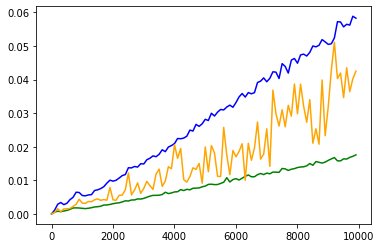

In [181]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    return [random.randint(0, 50000000) for _ in range(size)]

def generate_running_times(max_size):
    median_quicksort_rt = []
    random_quicksort_rt = []
    quicksort_rt = []
    measurements = [
        median_quicksort_rt,
        random_quicksort_rt,
        quicksort_rt
    ]
    algorithms = [
        timed_median_quicksort,
        timed_random_quicksort,
        timed_quicksort
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        for index, algorithm in enumerate(algorithms):
            measurements[index].append(algorithm(array))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(10000)

colors = ["blue", "green", "orange"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

In the above graph:

* blue is our median_quicksort
* green is random_quicksort
* orange is quicksort

Clearly random quicksort is the best, especially as the number of elements in the array grows.  Our median quicksort does the worst.  And the original quicksort is bounded between the two other versions of quicksort.  So it looks like picking the middle number is consistently _suboptimal_.  While selecting a random element is _always_ better than picking the first element.  In a sense this isn't surprising.  Our algorithm for implementing selecting the median is fairly complex.  If we could do better, making this selection algorithm _less complex_ perhaps we could do better than a random pivot.  We'll attempt this with an algorithm called select:

In [273]:
import math

def partition_five(array, left_index, right_index):
    i = left_index + 1
    while i <= right_index:
        j = i
        while (j > left_index) and (array[j-1] > array[j]):
            array[j-1], array[j] = array[j], array[j-1]
            j -= 1
        i += 1
    return math.floor((left_index + right_index) // 2)
    
def pivot(array, left_index, right_index):
    if right_index - left_index < 5:
        return partition_five(array, left_index, right_index)
    for i in range(left_index, right_index, 5):
        sub_right = i + 4
        if sub_right > right_index:
            sub_right = right_index
        median_five = partition_five(array, i, sub_right)
        array[median_five], array[left_index + math.floor((i-left_index)//5)]
    mid = (right_index - left_index)//10 + left_index + 1
    return select(array, left_index, left_index + math.floor((right_index - left_index)/5), mid)

def _partition(array, left_index, right_index, pivot_index, index):
    pivot_value = array[pivot_index]
    array[pivot_index], array[right_index] = array[right_index], array[pivot_index]
    store_index = left_index
    for i in range(left_index, right_index):
        if array[i] < pivot_value:
            array[store_index], array[i] = array[i], array[store_index]
            store_index += 1
    store_index_eq = store_index
    for i in range(store_index, right_index):
        if array[i] == pivot_value:
            array[store_index_eq], array[i] = array[i], array[store_index_eq]
            store_index_eq += 1
    array[right_index], array[store_index_eq] = array[store_index_eq], array[right_index] 
    if index < store_index:
        return store_index
    if index <= store_index_eq:
        return index
    return store_index_eq

def select(array, left_index, right_index, index):
    if left_index == right_index:
        return left_index
    pivot_index = pivot(array, left_index, right_index)
    pivot_index = _partition(
        array, left_index, right_index, pivot_index, index
    )
    if index == pivot_index:
        return index
    elif index < pivot_index:
        right_index = pivot_index - 1
    else:
        left_index = pivot_index + 1
    return select(array, left_index, right_index, index)

select(array, 0, len(array)-1, len(array)//2)

4

let's see if this yields a faster quicksort:

In [274]:
def select_quicksort(arr):
    if len(arr) == 1 or len(arr) == 0:
        return arr
    else:
        pivot_index = select(arr, 0, len(arr)-1, len(arr)//2)
        pivot = arr[pivot_index]
        less = []
        equal = []
        greater = []
        for elem in arr:
            if elem < pivot:
                less.append(elem)
            elif elem == pivot:
                equal.append(elem)
            else:
                greater.append(elem)
        return quicksort(less)+equal+quicksort(greater)
    
def generate_array(size):
    return [random.randint(0, 50000000) for _ in range(size)]

def test_select_quicksort():
    for _ in range(100):
        arr = generate_array(500)
        sorted_arr = arr[:]
        sorted_arr.sort()
        assert select_quicksort(arr) == sorted_arr
        
test_select_quicksort()
timed_select_quicksort = calculate_time(select_quicksort)

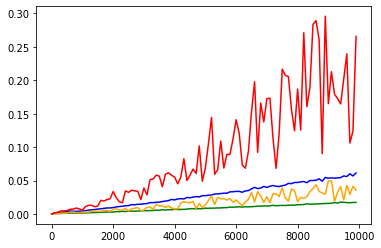

In [277]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    return [random.randint(0, 50000000) for _ in range(size)]

def generate_running_times(max_size):
    median_quicksort_rt = []
    random_quicksort_rt = []
    quicksort_rt = []
    select_quicksort_rt = []
    measurements = [
        median_quicksort_rt,
        random_quicksort_rt,
        quicksort_rt,
        select_quicksort_rt
    ]
    algorithms = [
        timed_median_quicksort,
        timed_random_quicksort,
        timed_quicksort,
        timed_select_quicksort
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        for index, algorithm in enumerate(algorithms):
            measurements[index].append(algorithm(array))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(10000)

colors = ["blue", "green", "orange", "red"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

Here we have:

* select_quicksort in red
* median_quicksort in blue
* quicksort in orange
* random_quicksort in green

Clearly our select algorithm does no better to improve our running time and in fact, makes things much worse.  This is probably because 